In [ ]:
#https://www.youtube.com/watch?v=qFJeN9V1ZsI&ab_channel=freeCodeCamp.org

## Data Preprocessing

In [19]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [20]:
train_labels = []
train_samples = []

### Creating numerical data ourselves
##### Example data
##### - Experimental drug tested on individuals from ages 13 to 100 in clinical trial
##### - Trial has 2100 participants. Half under 65 and half above 65.
##### -  Around 95% of patients 65 or older experiences side effects
##### - Around 95% of patients under 65 no experiences side effects

In [21]:
for i in range(50):
    # ~5% of younger than 65 experienced side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger) 
    train_labels.append(1)
    
    # ~5% of older than 65 experienced NO side effect
    random_younger = randint(65,100)
    train_samples.append(random_younger) 
    train_labels.append(0)
    
for i in range(1000):
    # ~95% of younger than 65 experienced NO side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger) 
    train_labels.append(0)
    
    # ~95% of older than 65 experienced side effect
    random_younger = randint(65,100)
    train_samples.append(random_younger) 
    train_labels.append(1)

In [25]:
#feeding the fit function by taking the list and converting into numpy array
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_samples, train_labels = shuffle(train_samples, train_labels)

In [27]:
scaler = MinMaxScaler(feature_range=(0,1)) #converting from 13 - 100 to 0 - 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #reshape bc fit function does not accept 1-D
                      

### Keras sequential Model

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Building a Sequential Model

In [36]:
model = Sequential ([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax') # dense means densely connected layer and softmax is used to show probablity between the two classes
])

In [37]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Prepare the model for training

In [38]:
model.compile (optimizer = Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Training the model

In [42]:
model.fit(x = scaled_train_samples, y =  train_labels, validation_split = 0.1, batch_size = 10, epochs = 30,shuffle = True, verbose = 2)

Epoch 1/30
189/189 - 0s - loss: 0.2445 - accuracy: 0.9476 - val_loss: 0.2151 - val_accuracy: 0.9524
Epoch 2/30
189/189 - 0s - loss: 0.2446 - accuracy: 0.9476 - val_loss: 0.2160 - val_accuracy: 0.9524
Epoch 3/30
189/189 - 0s - loss: 0.2441 - accuracy: 0.9481 - val_loss: 0.2163 - val_accuracy: 0.9524
Epoch 4/30
189/189 - 0s - loss: 0.2439 - accuracy: 0.9476 - val_loss: 0.2155 - val_accuracy: 0.9524
Epoch 5/30
189/189 - 0s - loss: 0.2435 - accuracy: 0.9476 - val_loss: 0.2155 - val_accuracy: 0.9524
Epoch 6/30
189/189 - 0s - loss: 0.2434 - accuracy: 0.9476 - val_loss: 0.2148 - val_accuracy: 0.9524
Epoch 7/30
189/189 - 0s - loss: 0.2430 - accuracy: 0.9476 - val_loss: 0.2153 - val_accuracy: 0.9524
Epoch 8/30
189/189 - 0s - loss: 0.2429 - accuracy: 0.9476 - val_loss: 0.2149 - val_accuracy: 0.9524
Epoch 9/30
189/189 - 0s - loss: 0.2426 - accuracy: 0.9476 - val_loss: 0.2149 - val_accuracy: 0.9524
Epoch 10/30
189/189 - 0s - loss: 0.2423 - accuracy: 0.9476 - val_loss: 0.2154 - val_accuracy: 0.9524

## Preparing Test data

In [47]:
test_labels = []
test_samples = []

In [48]:
for i in range(10):
    # ~5% of younger than 65 experienced side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger) 
    test_labels.append(1)
    
    # ~5% of older than 65 experienced NO side effect
    random_younger = randint(65,100)
    test_samples.append(random_younger) 
    test_labels.append(0)
    
for i in range(200):
    # ~95% of younger than 65 experienced NO side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger) 
    test_labels.append(0)
    
    # ~95% of older than 65 experienced side effect
    random_younger = randint(65,100)
    test_samples.append(random_younger) 
    test_labels.append(1)

In [49]:
#feeding the fit function by taking the list and converting into numpy array
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [50]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [52]:
predictions = model.predict(x=scaled_test_samples,batch_size = 10, verbose = 0) #verbose 0 since we dont need output from this

In [2]:
#for i in predictions:
#    print(i) #shows the probablity in test set that the patient not experiencing side effect or experiencing side effect

In [55]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [1]:
#for i in rounded_predictions :
#    print(i)

### Confusion Matrix

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [58]:
cm = confusion_matrix(y_true = test_labels , y_pred = rounded_predictions )

In [59]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


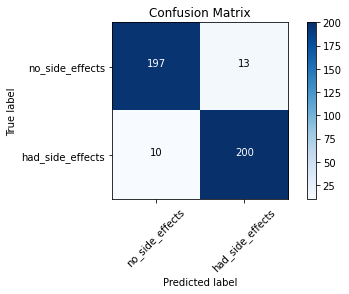

In [61]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')